In [1]:
import numpy as np
import pandas as pd
import random
from datetime import datetime
import matplotlib.pyplot as plt
import os.path
from bs4 import BeautifulSoup
import requests
import wfdb

In [2]:
record_segment_good_length_path = '../../../2_data/'

In [3]:
!ls -l $record_segment_good_length_path

total 1216
-rw-r--r--   1 tarus  staff  286811 Feb  3 23:19 record_segment_good_length_0_1774.csv
-rw-r--r--   1 tarus  staff  286811 Feb  3 23:12 record_segment_good_length_0_9999.csv
drwxr-xr-x  14 tarus  staff     448 Feb  3 20:05 xold_01


In [4]:
first_record = 0
last_record = 1774
record_list_file = record_segment_good_length_path + 'record_segment_good_length_' + str(first_record) + '_' + str(last_record) + '.csv'
print('record_list_file: {}'.format(record_list_file))

record_list_file: ../../../2_data/record_segment_good_length_0_1774.csv


In [5]:
!ls -l $record_list_file

-rw-r--r--  1 tarus  staff  286811 Feb  3 23:19 ../../../2_data/record_segment_good_length_0_1774.csv


In [6]:
segment_list_1 = pd.read_csv(record_list_file, header=None)

In [7]:
segment_list_1.head()

,0,1,2
0,4,p00/p000052/p000052-2191-01-10-02-21,3238451_0005
1,5,p00/p000052/p000052-2191-01-10-12-15,3533390_0001
2,5,p00/p000052/p000052-2191-01-10-12-15,3533390_0003
3,5,p00/p000052/p000052-2191-01-10-12-15,3533390_0004
4,5,p00/p000052/p000052-2191-01-10-12-15,3533390_0007


In [23]:
directory = [y[0] + '/' + y[1] + '/' for y in [x.split('/') for x in segment_list_1.iloc[:,1]]]
#directory

In [24]:
matched_record = [y[2] for y in [x.split('/') for x in segment_list_1.iloc[:,1]]]
#matched_record

In [25]:
segment_list_1.insert(loc=1, column='directory', value=directory)

In [26]:
segment_list_1.head()

,0,directory,1,2
0,4,p00/p000052/,p00/p000052/p000052-2191-01-10-02-21,3238451_0005
1,5,p00/p000052/,p00/p000052/p000052-2191-01-10-12-15,3533390_0001
2,5,p00/p000052/,p00/p000052/p000052-2191-01-10-12-15,3533390_0003
3,5,p00/p000052/,p00/p000052/p000052-2191-01-10-12-15,3533390_0004
4,5,p00/p000052/,p00/p000052/p000052-2191-01-10-12-15,3533390_0007


In [27]:
segment_list_1.insert(loc=2, column='matched_record', value=matched_record)

In [28]:
segment_list_1.head()

,0,directory,matched_record,1,2
0,4,p00/p000052/,p000052-2191-01-10-02-21,p00/p000052/p000052-2191-01-10-02-21,3238451_0005
1,5,p00/p000052/,p000052-2191-01-10-12-15,p00/p000052/p000052-2191-01-10-12-15,3533390_0001
2,5,p00/p000052/,p000052-2191-01-10-12-15,p00/p000052/p000052-2191-01-10-12-15,3533390_0003
3,5,p00/p000052/,p000052-2191-01-10-12-15,p00/p000052/p000052-2191-01-10-12-15,3533390_0004
4,5,p00/p000052/,p000052-2191-01-10-12-15,p00/p000052/p000052-2191-01-10-12-15,3533390_0007


In [13]:
segment_list_1.iloc[0,1].split('/')

['p00', 'p000052', 'p000052-2191-01-10-02-21']

In [73]:
# drop the first column
#segment_list_1.drop(segment_list_1.columns[[0]], axis=1, inplace=True)

In [8]:
#segment_list_1.head()

In [9]:
record_list_1 = segment_list_1.groupby(segment_list_1.iloc[:,0],as_index=False).agg(list)

In [10]:
record_list_1.head()

,0,1,2
0,[4],[p00/p000052/p000052-2191-01-10-02-21],[3238451_0005]
1,"[5, 5, 5, 5, 5, 5, 5, 5, 5]","[p00/p000052/p000052-2191-01-10-12-15, p00/p00...","[3533390_0001, 3533390_0003, 3533390_0004, 353..."
2,"[9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, ...","[p00/p000107/p000107-2121-11-30-20-03, p00/p00...","[3805787_0005, 3805787_0008, 3805787_0011, 380..."
3,"[10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 1...","[p00/p000107/p000107-2122-05-14-21-01, p00/p00...","[3860035_0001, 3860035_0004, 3860035_0006, 386..."
4,"[11, 11, 11, 11, 11, 11, 11]","[p00/p000107/p000107-2123-07-26-03-10, p00/p00...","[3746356_0006, 3746356_0008, 3746356_0012, 374..."


In [85]:
record_list_1.shape

(332, 2)

In [88]:
record_list_1.iloc[0,0][0]

10

In [90]:
for root in record_list_1.iloc[0,1]:
    print(root)
    

p00/p000107/3860035_0001
p00/p000107/3860035_0004
p00/p000107/3860035_0006
p00/p000107/3860035_0009
p00/p000107/3860035_0010
p00/p000107/3860035_0011
p00/p000107/3860035_0012
p00/p000107/3860035_0014
p00/p000107/3860035_0016
p00/p000107/3860035_0022
p00/p000107/3860035_0024
p00/p000107/3860035_0029
p00/p000107/3860035_0031
p00/p000107/3860035_0032
p00/p000107/3860035_0034
p00/p000107/3860035_0037
p00/p000107/3860035_0040
p00/p000107/3860035_0044


In [97]:
root_list = [x.split('/') for x in record_list_1.iloc[0,1]]
root_list

[['p00', 'p000107', '3860035_0001'],
 ['p00', 'p000107', '3860035_0004'],
 ['p00', 'p000107', '3860035_0006'],
 ['p00', 'p000107', '3860035_0009'],
 ['p00', 'p000107', '3860035_0010'],
 ['p00', 'p000107', '3860035_0011'],
 ['p00', 'p000107', '3860035_0012'],
 ['p00', 'p000107', '3860035_0014'],
 ['p00', 'p000107', '3860035_0016'],
 ['p00', 'p000107', '3860035_0022'],
 ['p00', 'p000107', '3860035_0024'],
 ['p00', 'p000107', '3860035_0029'],
 ['p00', 'p000107', '3860035_0031'],
 ['p00', 'p000107', '3860035_0032'],
 ['p00', 'p000107', '3860035_0034'],
 ['p00', 'p000107', '3860035_0037'],
 ['p00', 'p000107', '3860035_0040'],
 ['p00', 'p000107', '3860035_0044']]

In [99]:
# get the Intermediate directory 
intermediate_directory = root_list[0][0]
intermediate_directory

'p00'

In [129]:
# get the directory
directory = root_list[0][0] + '/' + root_list[0][1] + '/'
directory

'p00/p000107/'

In [105]:
# get the user_id
user_id = root_list[0][1][1:]
int(user_id)

107

In [157]:
record_segment = [x[2] for x in root_list]
record_segment

['3860035_0001',
 '3860035_0004',
 '3860035_0006',
 '3860035_0009',
 '3860035_0010',
 '3860035_0011',
 '3860035_0012',
 '3860035_0014',
 '3860035_0016',
 '3860035_0022',
 '3860035_0024',
 '3860035_0029',
 '3860035_0031',
 '3860035_0032',
 '3860035_0034',
 '3860035_0037',
 '3860035_0040',
 '3860035_0044']

In [158]:
random.Random(4).shuffle(record_segment)

In [159]:
record_segment

['3860035_0031',
 '3860035_0037',
 '3860035_0011',
 '3860035_0040',
 '3860035_0016',
 '3860035_0034',
 '3860035_0010',
 '3860035_0032',
 '3860035_0001',
 '3860035_0024',
 '3860035_0004',
 '3860035_0006',
 '3860035_0044',
 '3860035_0012',
 '3860035_0029',
 '3860035_0009',
 '3860035_0022',
 '3860035_0014']

In [196]:
record_name = record_segment[6]
record_segment_signal = wfdb.rdsamp(record_name=record_name,
                                    pn_dir='mimic3wdb-matched/1.0/' + directory,
                                    channel_names=['PLETH'])
record_name

'3860035_0010'

In [197]:
record_segment_signal

(array([[       nan],
        [       nan],
        [       nan],
        ...,
        [0.38039216],
        [0.38039216],
        [0.38039216]]),
 {'fs': 125,
  'sig_len': 53875,
  'n_sig': 1,
  'base_date': None,
  'base_time': datetime.time(9, 39, 48),
  'units': ['NU'],
  'sig_name': ['PLETH'],
  'comments': []})

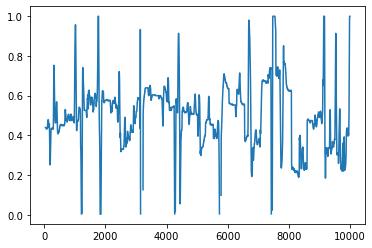

In [198]:
# Plotting the signal
plt.figure()
plt.plot(record_segment_signal[0][:10000])
plt.show()        

In [199]:
record_segment_signal

(array([[       nan],
        [       nan],
        [       nan],
        ...,
        [0.38039216],
        [0.38039216],
        [0.38039216]]),
 {'fs': 125,
  'sig_len': 53875,
  'n_sig': 1,
  'base_date': None,
  'base_time': datetime.time(9, 39, 48),
  'units': ['NU'],
  'sig_name': ['PLETH'],
  'comments': []})

In [146]:
record_segment_signal[0].shape

(2558375, 1)

In [154]:
np.isnan(record_segment_signal[0])

array([[ True],
       [ True],
       [ True],
       ...,
       [False],
       [False],
       [False]])

In [151]:
record_segment_signal[0][:10]

array([[nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan]])

In [171]:
np.argwhere(np.isnan(record_segment_signal[0])).shape

(7883, 2)

In [170]:
record_segment_signal[0][30:50]

array([[       nan],
       [       nan],
       [       nan],
       [       nan],
       [       nan],
       [       nan],
       [       nan],
       [       nan],
       [       nan],
       [0.49019608],
       [0.49019608],
       [0.49019608],
       [0.49019608],
       [0.49019608],
       [0.49019608],
       [0.49019608],
       [0.49019608],
       [0.49019608],
       [0.49019608],
       [0.49019608]])